## Import dataset and libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [5]:
data = pd.read_csv("C:/Users/Gayatri/Desktop/all folders/datsets/Car dekho.csv")
data.head()

,Name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Alto 800 LXI Opt,2023,410000,10000,Petrol,Individual,Manual,First Owner,19.03 kmpl,999 CC,71.01bhp,96Nm,5.0
1,Skoda Slavia 1.0 TSI Ambition,2023,1350000,10000,Petrol,Individual,Manual,First Owner,14.08 kmpl,1956 CC,167.67bhp,350nm,5.0
2,BMW 3 Series Gran Limousine 320Ld Luxury Line,2023,5800000,1000,Diesel,Dealer,Automatic,First Owner,18.15 kmpl,998 CC,118.35bhp,172Nm,5.0
3,MG ZS EV Exclusive,2023,2650000,10000,Electric,Dealer,Automatic,First Owner,32.52 kmpl,998 CC,58.33bhp,78Nm,5.0
4,Tata Punch Adventure,2023,715000,10000,Petrol,Individual,Manual,First Owner,12.15 kmpl,1451 CC,141bhp,250Nm,5.0


In [6]:
data.columns

Index(['Name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [7]:
col_names = data.columns
for col in col_names:
    print(data[col].value_counts())

Maruti Swift Dzire VDI                 129
Maruti Alto 800 LXI                     82
Maruti Alto LXi                         71
BMW X4 M Sport X xDrive20d              62
Maruti Swift VDI                        61
                                      ... 
BMW X3 xDrive20d                         1
Chevrolet Captiva 2.2 LTZ AWD            1
Hyundai Grand i10 1.2 Kappa Era          1
Hyundai EON Era Plus Sports Edition      1
Mahindra Willys CJ 3B 4X4                1
Name: Name, Length: 2076, dtype: int64
2017    1018
2016     859
2018     807
2015     776
2013     670
2012     651
2014     621
2011     592
2019     583
2010     394
2009     246
2008     214
2007     183
2006     124
2005      97
2020      74
2004      62
2003      49
2002      27
2000      22
1999      18
1997      11
2001      10
1998      10
2021       7
2022       7
2023       6
1996       3
1994       3
1995       2
1991       1
1983       1
Name: year, dtype: int64
300000     227
600000     213
350000     209
55

## Data preprocessing

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,2,2,2,2,2
1,3,3,2,2,2,0,2
2,3,3,2,2,1,1,2
3,3,3,2,2,1,2,2
4,3,3,2,2,1,0,2


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   int64 
 1   maint     1727 non-null   int64 
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   int64 
 5   safety    1727 non-null   int64 
 6   class     1727 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 94.6+ KB


In [86]:
data.describe()

,buying,maint,lug_boot,safety,class
count,1727.000000,1727.000000,1727.000000,1727.00000,1727.000000
mean,1.499131,1.499131,0.999421,1.00000,1.552982
std,1.118098,1.118098,0.816615,0.81697,0.876136
min,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.500000,0.500000,0.000000,0.00000,1.000000
50%,1.000000,1.000000,1.000000,1.00000,2.000000
75%,2.000000,2.000000,2.000000,2.00000,2.000000
max,3.000000,3.000000,2.000000,2.00000,3.000000


In [87]:
data.shape

(1727, 7)

In [88]:
data.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [89]:
data.nunique

<bound method DataFrame.nunique of       buying  maint  doors persons  lug_boot  safety  class
0          3      3      2       2         2       2      2
1          3      3      2       2         2       0      2
2          3      3      2       2         1       1      2
3          3      3      2       2         1       2      2
4          3      3      2       2         1       0      2
...      ...    ...    ...     ...       ...     ...    ...
1722       1      1  5more    more         1       2      1
1723       1      1  5more    more         1       0      3
1724       1      1  5more    more         0       1      2
1725       1      1  5more    more         0       2      1
1726       1      1  5more    more         0       0      3

[1727 rows x 7 columns]>

In [102]:
data["class"].value_counts()

2    1209
0     384
1      69
3      65
Name: class, dtype: int64

## Exploratory data analysis

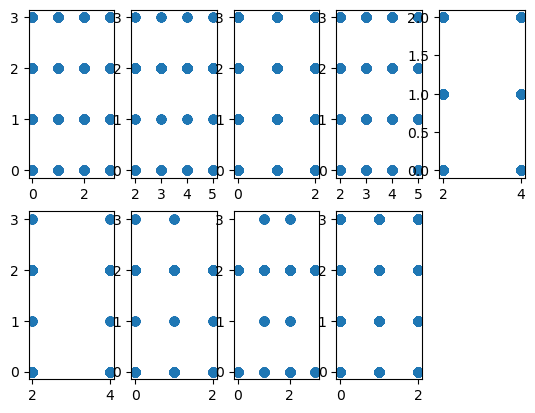

In [103]:
plt.subplot(2,5,1)
plt.scatter(x = data["buying"] , y = data["maint"])
plt.subplot(2,5,2)
plt.scatter(x = data["doors"] , y = data["class"])
plt.subplot(2,5,3)
plt.scatter(x = data["safety"] , y = data["maint"])
plt.subplot(2,5,4)
plt.scatter(x = data["doors"] , y = data["maint"])
plt.subplot(2,5,5)
plt.scatter(x = data["persons"] , y = data["lug_boot"])
plt.subplot(2,5,6)
plt.scatter(x = data["persons"] , y = data["class"])
plt.subplot(2,5,7)
plt.scatter(x = data["lug_boot"] , y = data["class"])
plt.subplot(2,5,8)
plt.scatter(x = data["buying"] , y = data["class"])
plt.subplot(2,5,9)
plt.scatter(x = data["lug_boot"] , y = data["maint"])


<Axes: xlabel='buying', ylabel='count'>

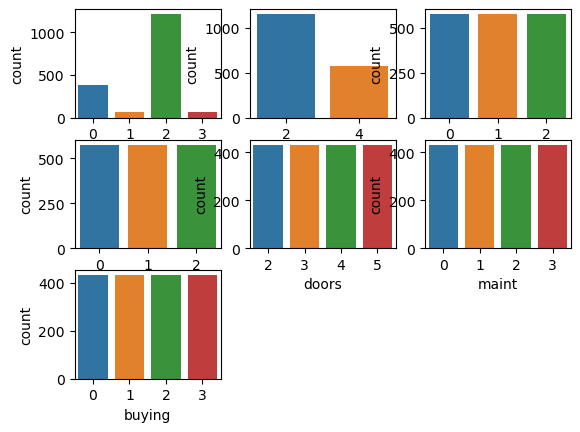

In [104]:
plt.subplot(3,3,1)
sns.countplot(x = data["class"])
plt.subplot(3,3,2)
sns.countplot(x = data["persons"])
plt.subplot(3,3,3)
sns.countplot(x = data["lug_boot"])
plt.subplot(3,3,4)
sns.countplot(x = data["safety"])
plt.subplot(3,3,5)
sns.countplot(x = data["doors"])
plt.subplot(3,3,6)
sns.countplot(x = data["maint"])
plt.subplot(3,3,7)
sns.countplot(x = data["buying"])


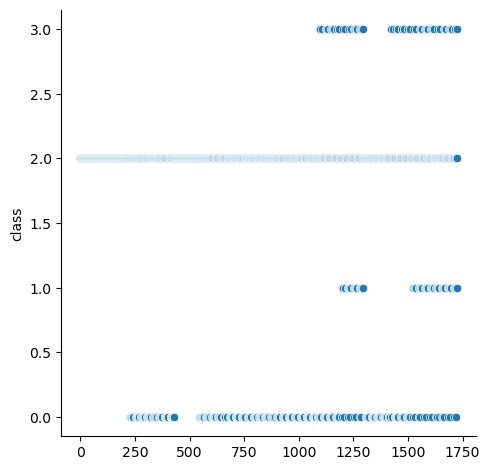

In [105]:
sns.relplot(data = data["class"])

## traintestsplit

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# data["buying"] = le.fit_transform(data["buying"])
# data["lug_boot"] = le.fit_transform(data["lug_boot"])
# data["safety"] = le.fit_transform(data["safety"])
# data["class"] = le.fit_transform(data["class"])
# data["maint"] = le.fit_transform(data["maint"])
# data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,2,2,2,2,2
1,3,3,2,2,2,0,2
2,3,3,2,2,1,1,2
3,3,3,2,2,1,2,2
4,3,3,2,2,1,0,2


In [9]:
# x = data.drop(["class"], axis = True)
# x

In [109]:
y = data["class"]
y

0       2
1       2
2       2
3       2
4       2
       ..
1722    1
1723    3
1724    2
1725    1
1726    3
Name: class, Length: 1727, dtype: int64

In [110]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 2)

In [111]:
xtrain.shape
xtrain

,buying,maint,doors,persons,lug_boot,safety
542,0,0,2,2,1,1
20,3,3,2,2,1,1
968,2,3,5,2,0,1
556,0,0,2,4,0,0
1308,1,3,2,4,1,2
...,...,...,...,...,...,...
1558,1,2,3,2,2,0
1608,1,2,5,4,0,2
493,0,3,4,2,0,0
527,0,3,5,4,0,1


In [112]:
xtest.shape

(519, 6)

In [113]:
ytrain.shape

(1208,)

In [114]:
ytest.shape

(519,)

In [115]:
from sklearn.tree import DecisionTreeClassifier

In [116]:
giniindex = DecisionTreeClassifier(criterion = "gini")

In [117]:
giniindex.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [118]:
ypred= giniindex.predict(xtest)

In [119]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(ytest, ypred)

In [120]:
acc

0.7109826589595376

In [121]:
trainpred = giniindex.predict(xtrain)

In [124]:
acc1 = accuracy_score(ytrain, trainpred)

In [125]:
acc1

0.9122516556291391

In [126]:
print('Training set score: {:.4f}'.format(giniindex.score(xtrain, ytrain)))
print('Test set score: {:.4f}'.format(giniindex.score(xtest, ytest)))


Training set score: 0.9123
Test set score: 0.7110


[Text(0.6801705788622526, 0.9666666666666667, 'x[5] <= 0.5\ngini = 0.452\nsamples = 1208\nvalue = [263, 49, 852, 44]'),
 Text(0.4455265410958904, 0.9, 'x[3] <= 3.0\ngini = 0.629\nsamples = 395\nvalue = [133, 24, 194, 44]'),
 Text(0.338636796042618, 0.8333333333333334, 'x[0] <= 2.5\ngini = 0.537\nsamples = 269\nvalue = [65, 11, 169, 24]'),
 Text(0.2021974885844749, 0.7666666666666667, 'x[0] <= 0.5\ngini = 0.592\nsamples = 204\nvalue = [53, 11, 116, 24]'),
 Text(0.07553272450532725, 0.7, 'x[1] <= 2.5\ngini = 0.468\nsamples = 67\nvalue = [25, 0, 42, 0]'),
 Text(0.07248858447488585, 0.6333333333333333, 'x[4] <= 1.5\ngini = 0.5\nsamples = 51\nvalue = [25, 0, 26, 0]'),
 Text(0.04299847792998478, 0.5666666666666667, 'x[1] <= 0.5\ngini = 0.49\nsamples = 35\nvalue = [20, 0, 15, 0]'),
 Text(0.0197869101978691, 0.5, 'x[2] <= 3.5\ngini = 0.463\nsamples = 11\nvalue = [7, 0, 4, 0]'),
 Text(0.0121765601217656, 0.43333333333333335, 'x[2] <= 2.5\ngini = 0.49\nsamples = 7\nvalue = [4, 0, 3, 0]'),
 Text(

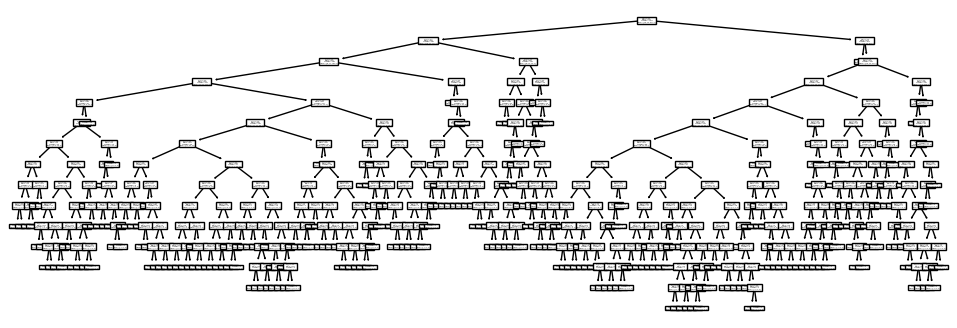

In [127]:
plt.figure(figsize=(12,4))
from sklearn import tree
tree.plot_tree(giniindex.fit(xtrain,ytrain))

## logistic regression

In [130]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [131]:
lr.fit(xtrain,ytrain)

C:\Users\Gayatri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [132]:
ypred = lr.predict(xtest)

In [133]:
acc2 = accuracy_score(ytest, ypred)

In [134]:
acc2

0.6859344894026975

In [135]:
xpred = lr.predict(xtrain)

In [136]:
acc3 = accuracy_score(ytrain, xpred)

In [137]:
acc3

0.7094370860927153

In [139]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, ypred)
cm

array([[  8,   0, 109,   4],
       [  0,   0,  20,   0],
       [  7,   0, 348,   2],
       [  2,   0,  19,   0]], dtype=int64)

In [140]:
dt = pd.DataFrame({"Actual": ytest, "predict": ypred})
dt

,Actual,predict
1190,2,2
503,2,2
1204,3,2
123,2,2
526,2,2
...,...,...
498,2,2
1497,0,2
70,2,2
367,0,2
